# **Human Resources Analytics - Milestone Report**
***

Any company be it a well known industrial giant or a freshly baked start-up, becomes what it is by its employees. It’s the employees who do the work. It’s the employees who shape the company’s culture. Long-term success, a healthy work environment, and high employee retention are all signs of a successful company. But when a company experiences a high rate of **employee turnover**, then something is going wrong. This can lead the company to huge monetary losses by these innovative and valuable employees.

Companies that maintain a healthy organization and culture are always a good sign of future prosperity. Recognizing and understanding what factors that were associated with employee turnover will allow companies and individuals to limit this from happening and may even increase employee productivity and growth. These predictive insights give managers the opportunity to take corrective steps to build and preserve their successful business.

**"You don't build a business. You build people, and people build the business." - Zig Ziglar**
***

<img src="https://static1.squarespace.com/static/5144a1bde4b033f38036b7b9/t/56ab72ebbe7b96fafe9303f5/1454076676264/"/>

### **About This Project**
***
This Project is aimed at approaching an **employee retention** problem through a **data science** point of view. 

I have covered my analysis and approach through different process flows in the data science pipeline, which includes statistical inference and exploratory data analysis. The main goal is to understand the reasoning behind employee turnover and to come up with a model to classify an employee’s risk of attrition. A recommendation for a retention plan was created, which incorporates some best practices for employee retention at different risk levels of attrition.

### **Business Problem**
***
*Bob is the owner of a multi-million dollar company. Bob's company's productivity and growth had sky rocketed from the previous years and everything has been going great. But recently, he's been noticing some decline within his company. In a five month period, he lost one-fifth of his employees. Suddenly his company is about to go bankrupt and he wants to know why his employees are leaving.*

### **Client**
***
*Bob - The Boss*

### **Objective**
***
*The company wants to understand what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not. The goal is to create or improve different retention strategies on targeted employees. Overall, the implementation of this model will allow management to create better decision-making actions.*

### **OSEMN Pipeline**
****

*For this project, I have followed a typical data science pipeline, which is call “OSEMN” (pronounced awesome).*

1. **O**btaining the data is the first approach in solving the problem.

2. **S**crubbing or cleaning the data is the next step. This includes data imputation of missing or invalid data and fixing column names.

3. **E**xploring the data will follow right after and allow further insight of what our dataset contains. Looking for any outliers or weird data. Understanding the relationship each explanatory variable has with the response variable resides here and we can do this with a correlation matrix. 

4. **M**odeling the data will give us our predictive power on whether an employee will leave. 

5. I**N**terpreting the data is last. With all the results and analysis of the data, what conclusion is made? What factors contributed most to employee turnover? What relationship of variables were found? 

### **1. Important Libraries and Dataset**
***

In [1]:
# Importing the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

# To ignore warnings generated by the current version of seaborn 
import warnings                  
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [2]:
# Read the analytics csv file and store our dataset into a dataframe called "data"
data = pd.read_csv('HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### **2. Scrubbing the Data**
***

*Typically, cleaning the data requires a lot of work and can be a very tedious procedure. This dataset from Kaggle is super clean and contains no missing values. But let us still examine the dataset to make sure that everything else is readable and that the observation values match the feature names appropriately.*

In [3]:
# Checking to see if there are any missing values in our data set
data.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [4]:
# A quick overview of what we are dealing with in our dataset
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# Renaming certain columns for better readability
data = data.rename(columns={'satisfaction_level': 'Satisfaction', 
                        'last_evaluation': 'Evaluation',
                        'number_project': 'ProjectCount',
                        'average_montly_hours': 'AverageMonthlyHours',
                        'time_spend_company': 'YearsAtCompany',
                        'Work_accident': 'WorkAccident',
                        'promotion_last_5years': 'Promotion',
                        'sales' : 'Department',
                        'salary':'Salary',
                        'left' : 'Turnover'
                        })

In [6]:
# Moving the reponse variable "Turnover" to the front of the table
front = data['Turnover']
data.drop(labels=['Turnover'], axis=1,inplace = True)
data.insert(0, 'Turnover', front)
data.head()

,Turnover,Satisfaction,Evaluation,ProjectCount,AverageMonthlyHours,YearsAtCompany,WorkAccident,Promotion,Department,Salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


### **3. Exploring the Data**
*** 

#### **3a. Statistical Overview** 
***


In [7]:
# The dataset contains 10 columns and 14999 observations
data.shape

(14999, 10)

In [8]:
# Checking the type of our features. 
data.dtypes

Turnover                 int64
Satisfaction           float64
Evaluation             float64
ProjectCount             int64
AverageMonthlyHours      int64
YearsAtCompany           int64
WorkAccident             int64
Promotion                int64
Department              object
Salary                  object
dtype: object

In [9]:
# Looks like about 76% of employees stayed and 24% of employees left. 
# NOTE: When performing cross validation, its important to maintain this turnover ratio
Turnover_rate = data.Turnover.value_counts() / len(data)
Turnover_rate

0    0.761917
1    0.238083
Name: Turnover, dtype: float64

In [10]:
# Displaying the statistical overview of the employees
data.describe()

,Turnover,Satisfaction,Evaluation,ProjectCount,AverageMonthlyHours,YearsAtCompany,WorkAccident,Promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [11]:
# Overview of summary (Turnover vs Non-turnover)
Turnover_Summary = data.groupby('Turnover')
Turnover_Summary.mean()

,Satisfaction,Evaluation,ProjectCount,AverageMonthlyHours,YearsAtCompany,WorkAccident,Promotion
Turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


The dataset has:
 - About **15,000** employees observations and 10 features. 
 - The company had a turnover rate of about **24%**.
 - Mean satisfaction of employees is **0.61**.

####  **3b. Correlation Matrix & Heatmap**
***


In [12]:
# Correlation Matrix
corr_mat = data.corr()
corr_mat

,Turnover,Satisfaction,Evaluation,ProjectCount,AverageMonthlyHours,YearsAtCompany,WorkAccident,Promotion
Turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
Satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
Evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
ProjectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
AverageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
YearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
WorkAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
Promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


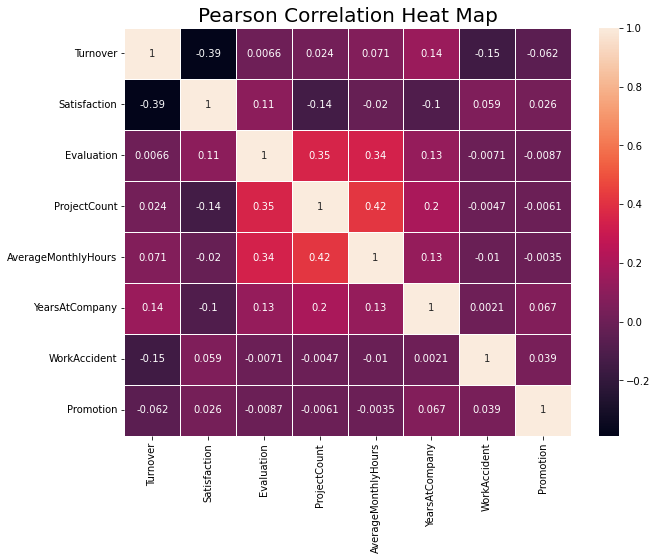

In [13]:
# Correlation Heat Map
plt.figure(figsize = (10,7.5))
plt.grid(axis = 'y', alpha = 0.5)
ax = sns.heatmap(data.corr(method = 'pearson'), annot = True, linewidth = 0.5)
ax.set_title('Pearson Correlation Heat Map', fontsize = 20)
plt.show()

**Objectives:**

We need to identify -  
- Which features affect our target variable (**Turnover**) the most?
- What features have strong correlations with each other?
- And try to do a more in depth examination of these features.

**Moderate Positively Correlated Features:** 
- Project Count vs Evaluation: **0.35**
- Project Count vs Average Monthly Hours: **0.42**
- Average Monthly Hours vs Evaluation: **0.34**

**Moderate Negatively Correlated Feature:**
 - Satisfaction vs Turnover:  **-0.39**

**Summary:**

From the heatmap, there is a **positive(+)** correlation between **ProjectCount**, **AverageMonthlyHours**, and **Evaluation**. Which could mean that the employees who spent more hours and did more projects were evaluated highly. 

For the **negative(-)** relationships, **Turnover** and **Satisfaction** are highly correlated. And we are assuming that people tend to leave a company more when they are less satisfied. 

#### **3c. Statistical Test for Correlation**
***



**One-Sample T-Test (Measuring Satisfaction Level)**

A One-Sample T-Test checks whether a sample mean differs from the population mean. Since satisfaction has the highest correlation with our dependent variable turnover, let's test to see whether the average satisfaction level of employees that had a turnover differs from the those that had no turnover.

**Hypothesis Testing:** Is there significant difference in the **means of satisfaction level** between employees who had a turnover and temployees who had no turnover?

 - **Null Hypothesis:** *(H0: pTS = pES)* The null hypothesis would be that there is **no** difference in satisfaction level between employees who did turnover and those who did not.

 - **Alternate Hypothesis:** *(HA: pTS != pES)* The alternative hypothesis would be that there **is** a difference in satisfaction level between employees who did turnover and those who did not.

In [14]:
# Let's compare the means of our employee turnover satisfaction against the employee population satisfaction
#emp_population = df['satisfaction'].mean()
emp_population = data['Satisfaction'][data['Turnover'] == 0].mean()
emp_turnover_satisfaction = data[data['Turnover']==1]['Satisfaction'].mean()

print( 'The mean satisfaction for the employee population with no turnover is: ' + str(emp_population))
print( 'The mean satisfaction for employees that had a turnover is: ' + str(emp_turnover_satisfaction) )

The mean satisfaction for the employee population with no turnover is: 0.666809590479516
The mean satisfaction for employees that had a turnover is: 0.44009801176140917


**Conducting the T-Test**
***
Let's conduct a t-test at **95% confidence level** and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the employee population. To conduct a one sample t-test, we can use the **stats.ttest_1samp()** function:

In [15]:
import scipy.stats as stats
tStat, pValue = stats.ttest_1samp(a=data[data['Turnover']==1]['Satisfaction'], # Sample of Employee satisfaction who had a Turnover
                  popmean=emp_population)  # Employee Who Had No Turnover satisfaction mean

In [16]:
print("P-Value:{0} & T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.0 & T-Statistic:-51.3303486754725


**T-Test Quantile**
***
The test result shows the **test statistic "t" is equal to -51.33**. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies **outside** the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. Let us check the quantiles with **stats.t.ppf()**:

In [17]:
degree_freedom = len(data[data['Turnover']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.9606285215955626
The t-distribution right quartile range is: 1.9606285215955621


**One-Sample T-Test Summary**
***
**T-Test = -51.33**       |        **P-Value = 0.00_**       |       **Reject Null Hypothesis**

**We will Reject the null hypothesis because:**
 - T-Test score is outside the quantiles
 - P-value is lower than confidence level of 5%

Based on the statistical analysis of a one sample t-test, there seems to be some significant difference between the mean satisfaction of employees who had a turnover and the entire employee population. The super low P-value of **0.00_** at a 5% confidence level is a good indicator to **reject the null hypothesis** (However, P value can never be zero, so P value must be very very low here). 

But this does not neccessarily mean that there is practical significance. We would have to conduct more experiments or maybe collect more data about the employees in order to come up with a more accurate finding.

<img src="https://static1.squarespace.com/static/5144a1bde4b033f38036b7b9/t/56714b05c647ad9f555348fa/1450265419456/PresentWIP.gif?format=500w"/>

####  **3d. Distribution Plots (Satisfaction - Evaluation - AverageMonthlyHours)**
***


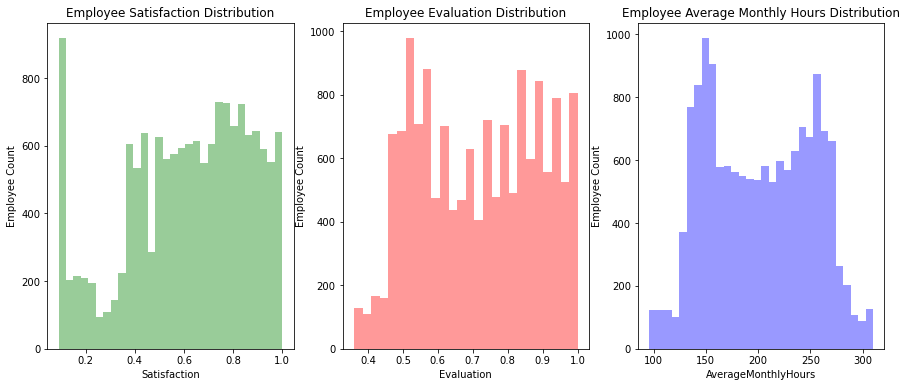

In [18]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(data.Satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(data.Evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(data.AverageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

plt.show()

**Objectives and Next Steps:**

To have a better idea of the above distributions and undersatnd why these actually look as they do above we need to collect more data and identify -  
 - The reason behind the high spike in low satisfaction of employees.
 - Is there any way we can put employees in groups or clusters based on these features?
 - Also is there a correlation between Evaluation and AverageMonthlyHours?

**Summary:** On examining the distribution on some of the employee's features, we can see that:
 - **Satisfaction** - There is a huge spike for employees with low satisfaction and high satisfaction.
 - **Evaluation** - There is a bimodal distrubtion of employees for low evaluations (less than 0.6) and high evaluations (more than 0.8).
 - **AverageMonthlyHours** - There is another bimodal distribution of employees with lower and higher average monthly hours (less than 150 hours & more than 250 hours).
 - The evaluation and average monthly hour graphs both share a similar distribution. 
 - Employees with lower average monthly hours were evaluated less and vice versa.
 - If you look back at the correlation matrix, the high correlation between Evaluation and AverageMonthlyHours does support this finding.
 


####  **3e. Salary vs Turnover**
***


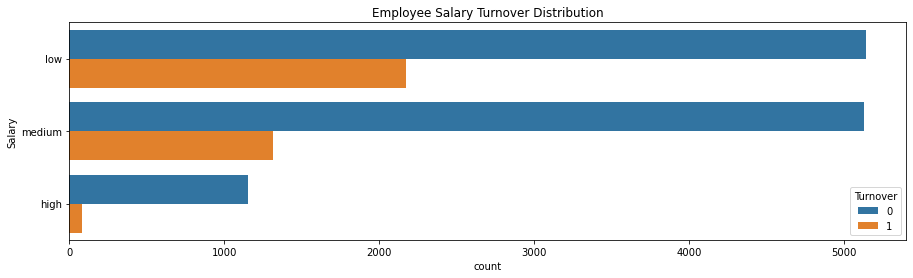

In [19]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="Salary", hue='Turnover', data=data).set_title('Employee Salary Turnover Distribution')
plt.show()

<img src="https://cdn.dribbble.com/users/20727/screenshots/2118641/video-producer-motion-graphics-designer-animator-jobs-manchester-uk.gif"/>

**Next Steps:** 
 
We need to find - 
 - What is the work environment like for low, medium, and high salary employees?
 - What made employees with high salaries to leave?

**Summary:** This is not unusual, as suspected:
 - Majority of employees who left either had **low** or **medium** salary.
 - Barely any employees left with **high** salary.
 - Employees with low to average salaries tend to leave the company.
 


####  **3f. Department vs Turnover**
***


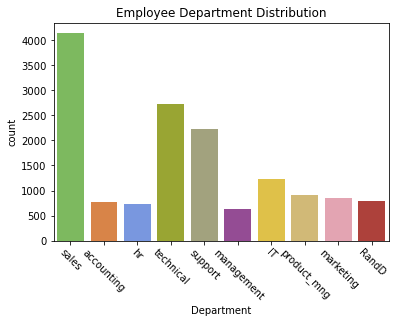

In [20]:
# Employee distribution
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Department', data=data, palette=color_types).set_title('Employee Department Distribution')
 
# Rotate x-labels
plt.xticks(rotation=-45)

plt.show()

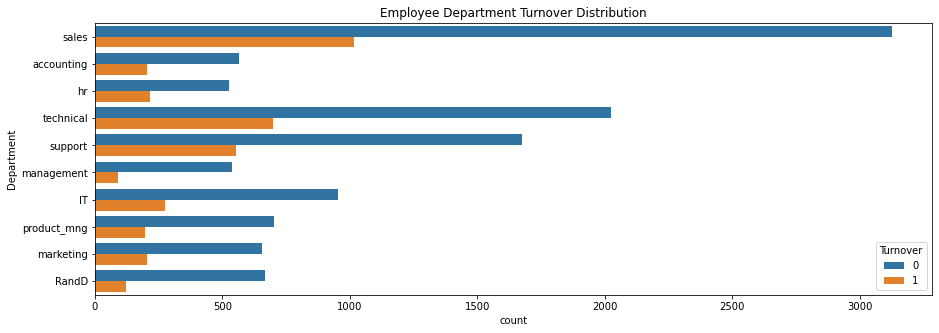

In [21]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="Department", hue='Turnover', data=data).set_title('Employee Department Turnover Distribution')
plt.show()

**Aim and Further Steps:** 
 - If we had more information on each department, can we pinpoint a more direct cause for employee turnover?

**Summary:** From the above plots we can clearly interpret the following insights about the different departments:
 - The **sales, technical, and support department** were the top 3 departments to have employee turnover.
 - The management department had the smallest amount of turnover.
 


####  **3g. Turnover vs ProjectCount** 
***


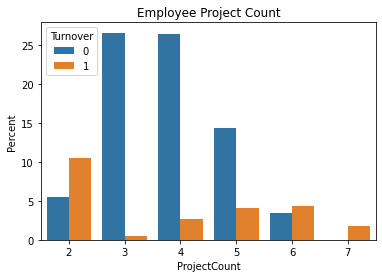

In [22]:
# Employee Project Count
ax = sns.barplot(x="ProjectCount", y="ProjectCount", hue="Turnover", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax.set(ylabel="Percent")
plt.title('Employee Project Count')
plt.show()

**Stop and Think:** 
 - Why are employees leaving at the lower/higher spectrum of project counts?
 - Does this means that employees with project counts 2 or less are not worked hard enough or are not highly valued, thus leaving the company?
 - Do employees with 6+ projects are getting overworked, thus leaving the company?



**Summary:** This graph is quite interesting as well:
 - More than half of the employees with **2, 6, and 7** projects left the company.
 - Majority of the employees who did not leave the company had **3, 4, and 5** projects.
 - All of the employees with **7** projects left the company.
 - There is an increase in employee turnover rate as project count increases.
 


####  **3h. Turnover vs Evaluation** 
***


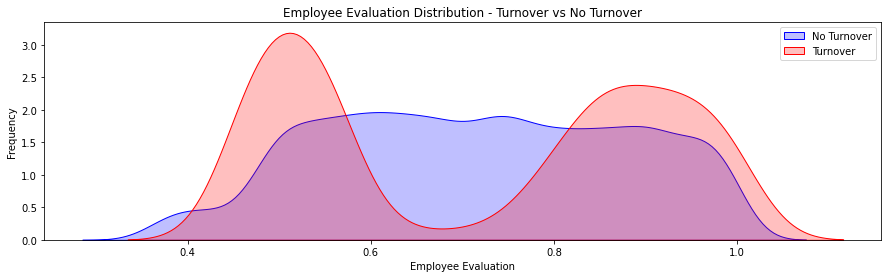

In [23]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(data.loc[(data['Turnover'] == 0),'Evaluation'] , color='b',shade=True,label='No Turnover')
ax=sns.kdeplot(data.loc[(data['Turnover'] == 1),'Evaluation'] , color='r',shade=True, label='Turnover')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Employee Evaluation Distribution - Turnover vs No Turnover')
plt.legend()
plt.show()

**Summary:** 
 - There is a biomodal distribution for those that had a turnover. 
 - Employees with **low** performance tend to leave the company more.
 - Employees with **high** performance tend to leave the company more.
 - The **sweet spot** for employees that stayed is within **0.6-0.8** evaluation.

####  **3i. Turnover vs AverageMonthlyHours** 
***


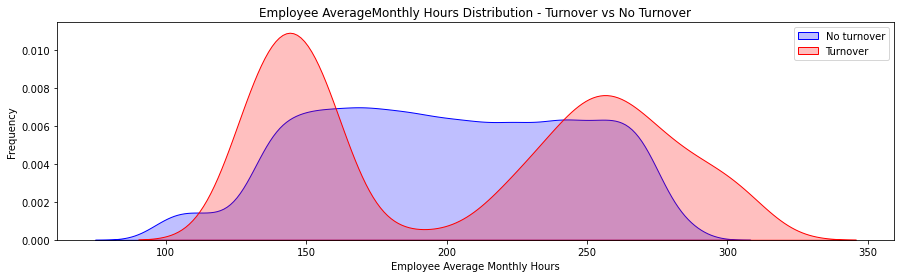

In [24]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Turnover'] == 0),'AverageMonthlyHours'] , color='b',shade=True, label='No turnover')
ax=sns.kdeplot(data.loc[(data['Turnover'] == 1),'AverageMonthlyHours'] , color='r',shade=True, label='Turnover')
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee AverageMonthly Hours Distribution - Turnover vs No Turnover')
plt.legend()
plt.show()

**Summary:** 
 - Another bi-modal distribution for employees that turnovered. 
 - Employees who had less hours of work **(~150 hours or less)** left the company more.
 - Employees who had too many hours of work **(~250 hours or more)** left the company.
 - Employees who left generally were **underworked** or **overworked**.

####  **3j. Turnover vs Satisfaction** 
***


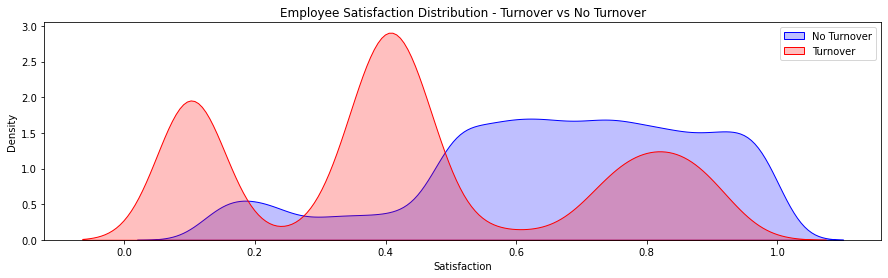

In [25]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Turnover'] == 0),'Satisfaction'] , color='b',shade=True, label='No Turnover')
ax=sns.kdeplot(data.loc[(data['Turnover'] == 1),'Satisfaction'] , color='r',shade=True, label='Turnover')
plt.title('Employee Satisfaction Distribution - Turnover vs No Turnover')
plt.legend()
plt.show()

**Summary:** 
 - There is a **tri-modal** distribution for employees that turnovered.
 - Employees who had really low satisfaction levels **(0.2 or less)** left the company more.
 - Employees who had low satisfaction levels **(0.3 to 0.5)** left the company more.
 - Employees who had really high satisfaction levels **(0.7 or more)** left the company more.

####  **3k. ProjectCount vs AverageMonthlyHours** 
***

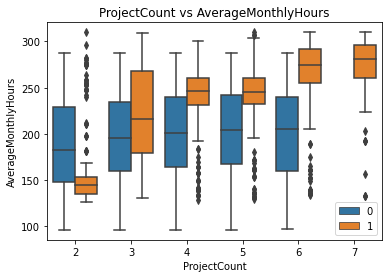

In [26]:
#ProjectCount VS AverageMonthlyHours [BOXPLOT]
#Looks like the average employees who stayed worked about 200hours/month. 
#Those that had a turnover worked about 250hours/month and 150hours/month.

sns.boxplot(x="ProjectCount", y="AverageMonthlyHours", hue="Turnover", data=data)
plt.title('ProjectCount vs AverageMonthlyHours')
plt.legend()
plt.show()

**Stop and Think:** 
 - What could be the meaning for this? 
 - **Why is it that employees who left worked more hours than employees who didn't, even with the same project count?**

**Summary:**
 - As project count increased, so did average monthly hours.
 - Something weird about the boxplot graph is the difference in AverageMonthlyHours between people who had a turnover and did not. 
 - Looks like employees who **did not** have a turnover had **consistent** AverageMonthlyHours, despite the increase in projects.
 - In contrast, employees who **did** have a turnover had an increase in AverageMonthlyHours with the increase in projects.


####  **3l. ProjectCount vs Evaluation**
***


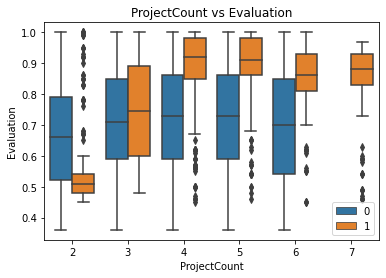

In [27]:
#ProjectCount VS Evaluation
#Looks like employees who did not leave the company had an average evaluation of around 70% even with different ProjectCounts.
#There is a huge skew in employees who had a turnover though. It drastically changes after 3 ProjectCounts. 
#Employees that had two projects and a horrible evaluation left. Employees with more than 3 projects and super high evaluations left

sns.boxplot(x="ProjectCount", y="Evaluation", hue="Turnover", data=data)
plt.title('ProjectCount vs Evaluation')
plt.legend()
plt.show()

**Questions to think about:**
 - **Why is it that employees who left, had on average, a higher evaluation than employees who did not leave, even with an increase in project count?**
 - Shouldn't employees with lower evaluations tend to leave the company more? 

**Summary:** This graph looks very similar to the graph above. Something strange with this graph is with the turnover group. There is an increase in evaluation for employees who did more projects within the turnover group. But, again for the non-turnover group, employees here had a consistent evaluation score despite the increase in project counts. 



####  **3m. Satisfaction vs Evaluation**
***


12345
**Summary:** This is by far the most compelling graph. 
 - There are **3** distinct clusters for employees who left the company
 
**Cluster 1 (Hard-working and Sad Employee):** Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but felt horrible at their job. 
 - **Question 1:** What could be the reason for feeling so horrible when you are highly evaluated? Could it be working too hard? Could this cluster mean employees who are "overworked"?

**Cluster 2 (Bad and Sad Employee):** Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.
 - **Question 2:** Could this cluster mean employees who "under-performed"?

**Cluster 3 (Hard-working and Happy Employee):** Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance. 
 - **Question 3:** Could this cluser mean that employees left because they found another job opportunity?



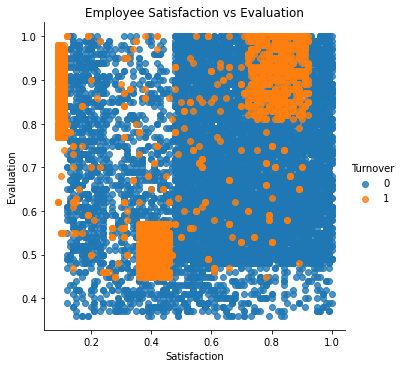

In [33]:
sns.lmplot(x='Satisfaction', y='Evaluation', data=data,
           fit_reg=False, # No regression line
           hue='Turnover')   # Color by evolution stage
plt.title('Employee Satisfaction vs Evaluation')
plt.show()

<AxesSubplot:xlabel='Satisfaction', ylabel='Evaluation'>

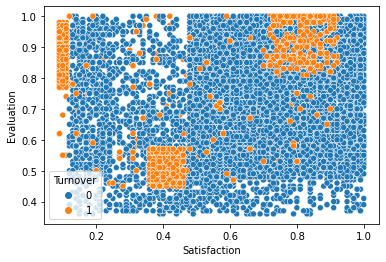

In [32]:
# plt.figure(figsize=(10,8))
# plt.subplot(3,4,index+1)
sns.scatterplot(x='Satisfaction',y='Evaluation',data=data,hue='Turnover')
# plt.xlabel(column)
# plt.ylabel('Rate of Penetration m/h')
# sns.lmplot(x='Satisfaction', y='Evaluation', data=data,
#            fit_reg=False, # No regression line
#            hue='Turnover')   # Color by evolution stage
# plt.title('Employee Satisfaction vs Evaluation')
# plt.show()

**Summary:** This is by far the most compelling graph. 
 
There are **3** distinct clusters for employees who left the company:
 
**Cluster 1 (Hard-working and Sad Employee):** Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but felt horrible at their job. 


**Cluster 2 (Bad and Sad Employee):** Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.


**Cluster 3 (Hard-working and Happy Employee):** Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance. 


#### **3n. Turnover vs YearsAtCompany** 
***


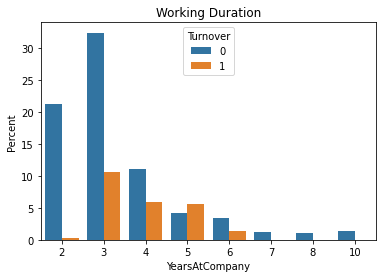

In [31]:
ax = sns.barplot(x="YearsAtCompany", y="YearsAtCompany", hue="Turnover", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax.set(ylabel="Percent")
plt.title('Working Duration')
plt.show()

**Stop and Think:** 
 - Why are employees leaving mostly at the **3-5** year range?
 - Who are these employees that left?
 - Are these employees part-time or contractors?

**Summary:** Let's see if theres a point where employees start leaving the company:
 - More than half of the employees with **4 and 5** years left the company.
 - Employees with **5** years should **highly** be looked into as they have a high turnover.  

#### **3o. K-Means Clustering of Employee Turnover**
***

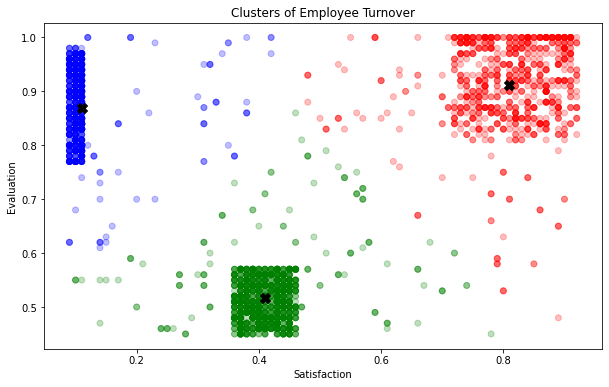

In [32]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(data[data.Turnover==1][["Satisfaction","Evaluation"]])

kmeans_colors = ['red' if c == 0 else 'blue' if c == 2 else 'green' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="Satisfaction",y="Evaluation", data=data[data.Turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

**Cluster 1 (Blue):** Hard-working and Sad Employees

**Cluster 2 (Red):** Bad and Sad Employee 

**Cluster 3 (Green):** Hard-working and Happy Employee

**Clustering PROBLEM:**
    - How do we know that there are "3" clusters?
    - We would need expert domain knowledge to classify the right amount of clusters
    - Hidden uknown structures could be present

### **4. Feature Importance**
***



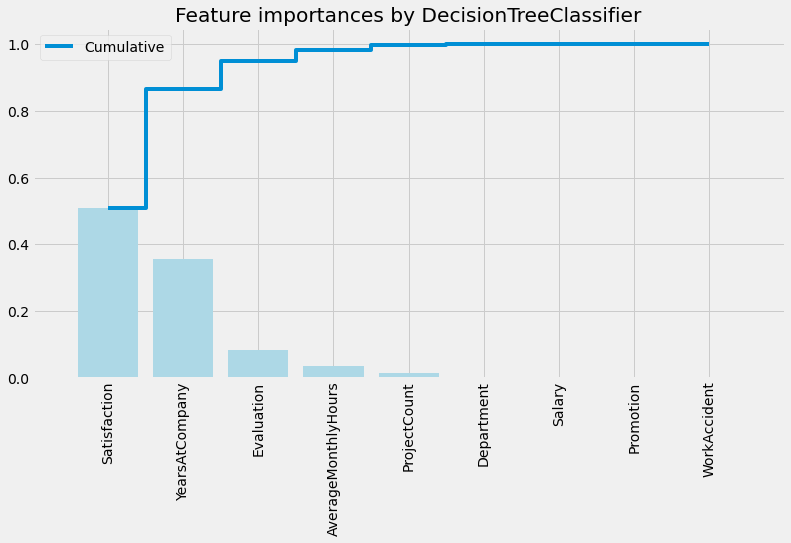

In [33]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10,6)

emp_data = data.copy()

# Convert these variables into categorical variables
emp_data["Department"] = emp_data["Department"].astype('category').cat.codes
emp_data["Salary"] = emp_data["Salary"].astype('category').cat.codes

# Create train and test splits
target_name = 'Turnover'
X = emp_data.drop('Turnover', axis=1)
y = emp_data[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = data.drop(['Turnover'],axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.legend()
plt.show()

**Summary:**

By using a decision tree classifier, it could rank the features used for the prediction. The top three features were employee **Satisfaction**, **YearsAtCompany**, and **Evaluation**. This is helpful in creating our model for logistic regression because it’ll be more interpretable to understand what goes into our model when we utilize less features. 

**Top 3 Features:**
1. Satisfaction
2. YearsAtCompany
3. Evaluation

### **5a. Modeling the Data: Logistic Regression Analysis**
***


**NOTE:** This is an in-depth analysis of using logistic regression as a classifier. **This is more of a use-case example of what can be done and explained to management in a company.**

Logistic Regression commonly deals with the issue of how likely an observation is to belong to each group. This model is commonly used to predict the likelihood of an event occurring. In contrast to linear regression, the output of logistic regression is transformed with a logit function. This makes the output either 0 or 1. This is a useful model to take advantage of for this problem because we are interested in predicting whether an employee will leave (0) or stay (1). 

Another reason for why logistic regression is the preferred model of choice is because of its interpretability. Logistic regression predicts the outcome of the response variable (Turnover) through a set of other explanatory variables, also called predictors. In context of this domain, the value of our response variable is categorized into two forms: 0 (zero) or 1 (one). The value of 0 (zero) represents the probability of an employee not leaving the company and the value of 1 (one) represents the probability of an employee leaving the company.


In [34]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline
#Read the analytics csv file and store our dataset into a dataframe called "df"
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

emp_data = pd.read_csv('HR_comma_sep.csv')

# Renaming certain columns for better readability
emp_data = emp_data.rename(columns={'satisfaction_level': 'Satisfaction', 
                        'last_evaluation': 'Evaluation',
                        'number_project': 'ProjectCount',
                        'average_montly_hours': 'AverageMonthlyHours',
                        'time_spend_company': 'YearsAtCompany',
                        'Work_accident': 'WorkAccident',
                        'promotion_last_5years': 'Promotion',
                        'sales' : 'Department',
                        'salary':'Salary',
                        'left' : 'Turnover'
                        })

# Convert these variables into categorical variables
emp_data["Department"] = emp_data["Department"].astype('category').cat.codes
emp_data["Salary"] = emp_data["Salary"].astype('category').cat.codes


# Move the reponse variable "turnover" to the front of the table
front = emp_data['Turnover']
emp_data.drop(labels=['Turnover'], axis=1,inplace = True)
emp_data.insert(0, 'Turnover', front)

# Create an intercept term for the logistic regression equation
emp_data['Intercept'] = 1
indep_var = ['Satisfaction', 'Evaluation', 'YearsAtCompany', 'Intercept', 'Turnover']
emp_data = emp_data[indep_var]

# Create train and test splits
target_name = 'Turnover'
X = emp_data.drop('Turnover', axis=1)
y = emp_data[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

X_train.head()

,Satisfaction,Evaluation,YearsAtCompany,Intercept
9003,0.59,1.00,3,1
5697,0.81,0.98,2,1
10691,1.00,0.93,2,1
1884,0.87,0.91,5,1
13572,0.87,0.48,3,1


#### **Using Logistic Regression Coefficients** 
***



In [35]:
import statsmodels.api as sm
iv = ['Satisfaction','Evaluation','YearsAtCompany', 'Intercept']
logReg = sm.Logit(y_train, X_train[iv])
answer = logReg.fit()

answer.summary
answer.params

Optimization terminated successfully.
         Current function value: 0.467233
         Iterations 6


Satisfaction     -3.769022
Evaluation        0.207596
YearsAtCompany    0.170145
Intercept         0.181896
dtype: float64

After eliminating the other variables, and using the three most important features we can create our model: Satisfaction, Evaluation, and YearsAtCompany.

Following overall equation was developed: 

**Employee Turnover Score = Satisfaction * (-3.769022) + Evaluation * (0.207596) + YearsAtCompany * (0.170145) + 0.181896**

The values above are the coefficient assigned to each independent variable. The **constant** (0.181896) represents the effect of all uncontrollable variables. 


#### **Intepretation of Score**
***


In [36]:
# Create function to compute coefficients
coef = answer.params
def y (coef, Satisfaction, Evaluation, YearsAtCompany) : 
    return coef[3] + coef[0]*Satisfaction + coef[1]*Evaluation + coef[2]*YearsAtCompany

import numpy as np

# An Employee with 0.7 Satisfaction and 0.8 Evaluation and worked 3 years has a 14% chance of turnover
y1 = y(coef, 0.7, 0.8, 3)
p = np.exp(y1) / (1+np.exp(y1)) # Applying Logistic function
p

0.14431462559738242

If we were to use these employee values into the equation:
- **Satisfaction**: 0.7
- **Evaluation**: 0.8
- **YearsAtCompany**: 3

We would get:

**Employee Turnover Score** = (**0.7**) * (-3.769022) + (**0.8**) * (0.207596) + (**3**) * (0.170145) + 0.181896 = 0.14431 = **14%**

**Result**: This employee would have a **14%** chance of leaving the company. This information can then be used to form our retention plan.

#### **Retention Plan Using Logistic Regression**
***




With the logistic regression model, we can now use our scores and evaluate the employees through different scoring metrics and assign each of them to a zone. Each zone is explained here:

1.	**Safe Zone (25% or below)** – Employees within this zone are considered safe. 
2.	**Low Risk Zone (25%-50%)** – Employees within this zone are too be taken into consideration of potential turnover. This is more of a long-term track.
3.	**Medium Risk Zone (50%-75%)** – Employees within this zone are at risk of turnover. Action should be taken and monitored accordingly. 
4.	**High Risk Zone (75% or above)** – Employees within this zone are considered to have the highest chance of turnover. Action should be taken immediately. 

So with our example above, the employee with a **14%** turnover score will be in the **safe zone**. 

### **5b. Using Other Models**
***

**NOTE:** In this section let us see four other models and measure the accuracy of the different models.

 The best model performance out of the four (Decision Tree Model, AdaBoost Model, Logistic Regression Model, Random Forest Model) was **Random Forest**! 

 **Note: Base Rate** 
 ***
 - A **Base Rate Model** is a simple model or heuristic used as reference point for comparing how well a model is performing. A baseline helps model developers quantify the minimal, expected performance on a particular problem. In this dataset, the majority class that will be predicted will be **0's**, which are employees who did not leave the company. 
 - If you recall back to *Part 3: Exploring the Data*, 24% of the dataset contained 1's (employee who left the company) and the remaining 76% contained 0's (employee who did not leave the company). The Base Rate Model would simply predict every 0's and ignore all the 1's. 
 - **Example**: The base rate accuracy for this data set, when classifying everything as 0's, would be 76% because 76% of the dataset are labeled as 0's (employees not leaving the company).

**Note: Evaluating the Model**
***
**Precision and Recall / Class Imbalance**

This dataset is an example of a class imbalance problem because of the skewed distribution of employees who did and did not leave. More skewed the class means that accuracy breaks down. 

In this case, evaluating our model’s algorithm based on **accuracy** is the **wrong** thing to measure. We would have to know the different errors that we care about and correct decisions. Accuracy alone does not measure an important concept that needs to be taken into consideration in this type of evaluation: **False Positive** and **False Negative** errors. 

**False Positives (Type I Error)**: You predict that the employee will leave, but the employee actually does not leave.

**False Negatives (Type II Error)**: You predict that the employee will not leave, but the employee actually does leave.


**Stope and Think:**
* In this problem, what type of errors do we care about more? False Positives or False Negatives?

 **Note: Different Ways to Evaluate Classification Models**
 ***
   1.  **Predictive Accuracy:** How many does it get right?
   2. **Speed:** How fast does it take for the model to deploy? 
   3. **Scalability:** Can the model handle large datasets?
   4. **Robustness:** How well does the model handle outliers/missing values?
   5. **Interpretability:** Is the model easy to understand?

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [38]:
# Create base rate model
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

In [39]:
# Create train and test splits
target_name = 'Turnover'
X = emp_data.drop('Turnover', axis=1)
#robust_scaler = RobustScaler()
#X = robust_scaler.fit_transform(X)
y=emp_data[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

In [40]:
# Check accuracy of base rate model
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print ("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.76


In [41]:
# Check accuracy of Logistic Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

model.fit(X_train, y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))

Logistic accuracy is 0.77


In [42]:
# Using 10 fold Cross-Validation to train our Logistic Regression Model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
kfold = model_selection.KFold(n_splits=10)#, random_state=7)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.793 (0.014)


#### **Logistic Regression vs Random Forest vs Decision Tree vs AdaBoost Model**
***

In [43]:
# Compare the Logistic Regression Model V.S. Base Rate Model V.S. Random Forest Model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


print ("---Base Model---")
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print ("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test, base_rate_model(X_test)))

# NOTE: By adding in "class_weight = balanced", the Logistic Auc increased by about 10%! This adjusts the threshold value
logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))

# Decision Tree Model
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))

# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))


# Ada Boost
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train,y_train)
print ("\n\n ---AdaBoost Model---")
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print ("AdaBoost AUC = %2.2f" % ada_roc_auc)
print(classification_report(y_test, ada.predict(X_test)))

---Base Model---
Base Rate AUC = 0.50
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1714
           1       0.00      0.00      0.00       536

    accuracy                           0.76      2250
   macro avg       0.38      0.50      0.43      2250
weighted avg       0.58      0.76      0.66      2250



 ---Logistic Model---
Logistic AUC = 0.74
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1714
           1       0.48      0.73      0.58       536

    accuracy                           0.75      2250
   macro avg       0.69      0.74      0.70      2250
weighted avg       0.80      0.75      0.76      2250



 ---Decision Tree Model---
Decision Tree AUC = 0.94
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1714
           1       0.87      0.91      0.89       536

    accuracy                           0.95   

#### **ROC Graph**
***

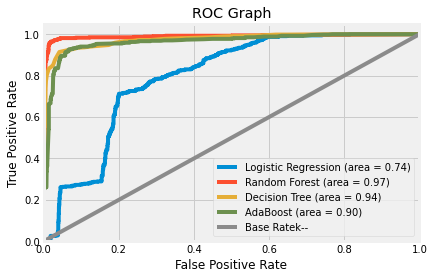

In [44]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

# Plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

### **6. Interpreting the Data**
***


**Summary:** 
With all of this information, this is what Bob should know about his company and why his employees probably left:
 1. Employees generally left when they are **underworked** (less than 150hr/month or 6hr/day)
 2. Employees generally left when they are **overworked** (more than 250hr/month or 10hr/day)
 3. Employees with either **really high or low evaluations** should be taken into consideration for high turnover rate
 4. Employees with **low to medium salaries** are the bulk of employee turnover
 5. Employees that had **2,6, or 7 project count** was at risk of leaving the company
 6. Employee **satisfaction** is the highest indicator for employee turnover.
 7. Employee that had **4 and 5 years at company** should be taken into consideration for high turnover rate
 8. Employee **satisfaction**, **years  at company**, and **evaluation** were the three biggest factors in determining turnover.

**"You don't build a business. You build people, and people build the business." - Zig Ziglar**
***
<img src="http://www.goldbeck.com/hrblog/wp-content/uploads/2015/11/giphy-3.gif"/>

### **Potential Solution**
***   

**Binary Classification**: Turnover vs Non Turnover

**Instance Scoring**: Likelihood of employee responding to an offer/incentive to save them from leaving.

**Need for Application**: To stop employees from leaving.

In our employee retention problem, rather than simply predicting whether an employee will leave the company within a certain time frame, we would much rather have an estimate of the probability that he/she will leave the company. 
We would rank employees by their probability of leaving, then allocate a limited incentive budget to the highest probability instances. 

Consider employee turnover domain where an employee is given treatment by Human  Resources because they think the employee will leave the company within a month, but the employee actually does not. This is a false positive. This mistake could be expensive, inconvenient, and time consuming for both the Human Resources and employee, but is a good investment for relational growth. 

Compare this with the opposite error, where Human Resources does not give treatment/incentives to the employees and they do leave. This is a false negative. This type of error is more detrimental because the company lost an employee, which could lead to great setbacks and more money to rehire. 
Depending on these errors, different costs are weighed based on the type of employee being treated. For example, if it’s a high-salary employee then would we need a costlier form of treatment? What if it’s a low-salary employee? The cost for each error is different and should be weighed accordingly. 
 
**Solution 1:** 
 - We can rank employees by their probability of leaving, then allocate a limited incentive budget to the highest probability instances.
 - Or, we can allocate our incentive budget to the instances with the highest expected loss, for which we'll need the probability of turnover.

**Solution 2:** 
Develop learning programs for managers. Then use analytics to gauge their performance and measure progress. Some advice:
 - Be a good coach
 - Empower the team and do not micromanage
 - Express interest for team member success
 - Have clear vision / strategy for team
 - Help team with career development 